In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PyUncertainNumber.pba.pbox_base import Pbox
from PyUncertainNumber.pba.cbox import *
from PyUncertainNumber.pba.params import Params
from intervals import Interval as I, intervalise

In [2]:
from PyUncertainNumber.pba.cbox.cbox import *
import random
random.seed(30)

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Bernoulli

In [ ]:
bdata = np.random.uniform(size=25) > 0.35

In [ ]:
cbox_bernoulli = CBbernoulli_p(bdata)

In [ ]:
cbox_bernoulli

In [ ]:
cbox_bernoulli.bound_params

In [ ]:
_ = cbox_bernoulli.display(style='band', parameter_name='Bernoulli p')

In [ ]:
# nextvalue
nextvalue_bernoulli = CBbernoulli(bdata)
nextvalue_bernoulli

In [ ]:
_ = nextvalue_bernoulli.display(style='band', title='pbox for Bernoulli next value')

### Bionomial ND

In [ ]:
# Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.
# get a sample named `d` from a binomial of n=12, p=0.6
d = np.random.binomial(12, 0.6, 5)
# d

In [ ]:
cbox_binomial = CBbinomial_p(d, 12)

In [ ]:
cbox_binomial

In [ ]:
_ = cbox_binomial.display(style='band', parameter_name='Bionomial p')

In [ ]:
# nextvalue
nextvalue_bernoulli = CBbinomial(d, 12)
nextvalue_bernoulli

In [ ]:
_ = nextvalue_bernoulli.display(style='band', title='pbox for Bionomial next value')

### Possion

In [ ]:
idata = np.round(np.random.uniform(size=25) * 16)
# idata

In [ ]:
cbox_poisson = CBpoisson_mean(idata)
cbox_poisson

In [ ]:
_ = cbox_poisson.display(style='band', parameter_name = 'Poisson lambda')

In [ ]:
nextvalue_poisson = CBpoisson(idata)
nextvalue_poisson

In [ ]:
_ = nextvalue_poisson.display(style='band', title='pbox for Poisson next value')

### Exponential

- note: lamba returns a confidence distribution as opposed to a cbox;
- nextvalue distribution is not analytic but sample based.

In [4]:
data = np.random.uniform(size=25) * 30

In [5]:
cbox_exponential = CBexponential_lambda(data)
cbox_exponential

Cbox ~ gamma(25, np.float64(0.0024085386981132478))

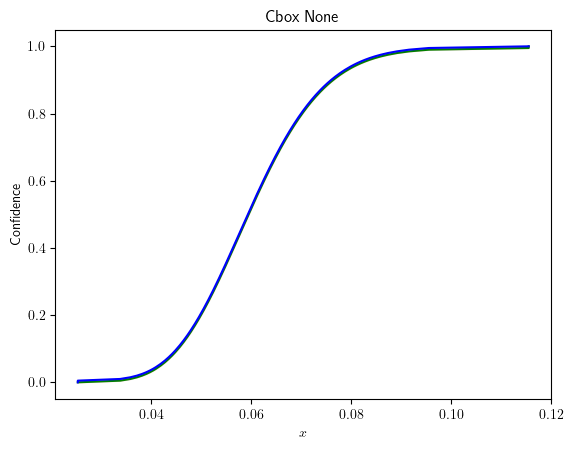

In [6]:
_ = cbox_exponential.display(style='band')

In [7]:
# samples-based CDF
nextvalue_exponential = CBexponential(data)

In [8]:
type(nextvalue_exponential)

PyUncertainNumber.pba.pbox_base.Pbox

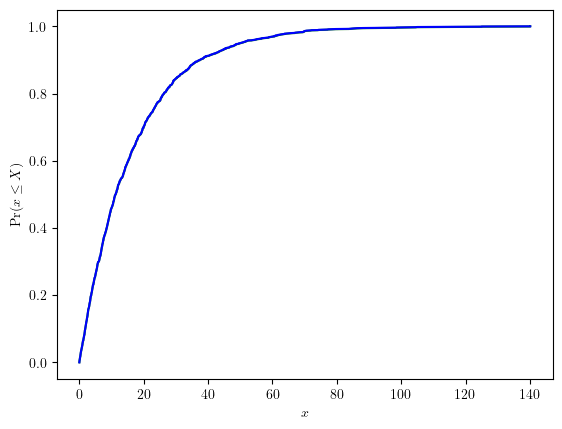

In [9]:
_ = nextvalue_exponential.display(style='band')

In [ ]:
# tst_pbox = Pbox(left = nextvalue_exponential)
# _ = tst_pbox.display(style='band')

# samples-based ...

In [ ]:
# x_sup = tranform_ecdf(nextvalue_exponential, display=False)
# nextvalue_exponential_pbox = Pbox(x_sup)
# _ = nextvalue_exponential_pbox.display(style='band')

### Gaussian

**Confidence distribution**

In [ ]:
data = np.random.normal(size=25)

In [ ]:
# mc_samples based cdf
scott_mu = CBnormal_mu(data, style='samples')

In [ ]:
scott_mu.shape

In [ ]:
# from scipy.stats import ecdf

# def plot_ecdf(s, **kwargs):
#     """ plot the CDF
    
#     args:
#         s: sample
#     """
#     sth = ecdf(s)
#     fig, ax = plt.subplots()
#     # ax.plot(x_support, p_values, color='g')
#     ax.step(sth.cdf.quantiles, sth.cdf.probabilities, color='red', zorder=10, **kwargs)
#     return ax

In [ ]:
_, ax = tranform_ecdf(s=scott_mu, display=True)
analytical_mu = CBnormal_mu(data)
analytical_mu.display(ax=ax, style='band')

In [ ]:
# axe = plot_ecdf(scott_mu, label='Monte Carlo samples based')
# axe.plot(x_support, analytical_mu, label='analytical based')
# axe.set_title('confidence distribution for normal mean from sample data')
# axe.legend()

In [ ]:
# Cbox for mu based on analytic solution

In [ ]:
# Cbox for mu based on samples-based solution

In [ ]:
# ''' test '''

# from PyUncertainNumber import pba

# n = 20
# # rv = t(n-1, loc=xm, scale = s/np.sqrt(n))

# test_pbox = pba.t(20-1, [2,3],[4,5])

# _ = test_pbox.display(style='band')

In [ ]:
interval_censored_data = [[8,11], [5.5,6.9], [1.3,0.3], [3.5,7.5], [0.8,1], [2.8,4.2], [1.8,5.2], [2.2,5.2], [3.5,5.7], [5.3,6.1]]
interval_censored_data_i = intervalise(interval_censored_data)
# interval_censored_data_i

In [ ]:
# for interval-valued data
iv_cbox = CBnormal_mu(interval_censored_data_i)

In [ ]:
iv_cbox

In [ ]:
_ = iv_cbox.display(style='band', parameter_name=r'Gaussian $\mu$ given interval data')

In [ ]:
# test for precise data 
lowbound_cbox = CBnormal_mu(interval_censored_data_i.lo)
_ = lowbound_cbox.display(style='band', parameter_name=r'Gaussian $\mu$ given precise data')

### Uniform

- sample based

# pool

In [ ]:
# p_values = np.linspace(0.01, 0.99, 200)
p_values = np.linspace(0.0001, 0.9999, 200)

In [ ]:
left_b = cdf2[0].ppf(p_values)

In [ ]:
# left_b

In [ ]:
right_b = cdf2[1].ppf(p_values)

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(left_b, p_values, 'x')
# ax.plot(right_b, p_values, '.')

In [ ]:
test_cbox = Pbox(
    left=left_b,
    right=right_b,
    steps=200,
    shape="beta",
)